# Data Analysis Final Project
## Mobile Application Stores Analysis

<img src="Media\Kaggle-site-logo.png" style="float: left;" width="70"/> <!-- Kaggle -->
Kaggle is used to get two datasets; One for Google Play Store applications data, and the second for Apple Store applications data.

In [597]:
# By: Shady Bartakh, On: 12/2021
# Libraries used are as follows

import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from datasist.structdata import detect_outliers
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

In [2]:
##Googleplay data
df=pd.read_csv("Google Play Store Apps\googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
# Second dataset
df2=pd.read_csv("Google Play Store Apps\googleplaystore_user_reviews.csv")
df2.sample(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
27246,ClassDojo,NaN,NaN,NaN,NaN
11113,Babbel – Learn Languages,NaN,NaN,NaN,NaN
4548,Agar.io,It's hard control. It lags lot. Can't even mov...,Negative,-0.518333,0.548333
32058,DEER HUNTER 2018,NaN,NaN,NaN,NaN
17311,Box,The best,Positive,1.000000,0.300000


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [6]:
df2['Sentiment'].unique()

array(['Positive', nan, 'Neutral', 'Negative'], dtype=object)

**_Sentiment_Polarity:_** The sentimental aspect of an opinion can be classified as Positive, Negative and Neutral.
<br>
**_Sentiment_Subjectivity:_** Classifying a sentence or a clause of the sentence as subjective or objective i.e. by determining whether a sentence expresses an opinion or not.

In [7]:
df[df['App']=='Box']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
204,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
265,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device


There are duplicate records!

In [8]:
df2[df2['App']=='Box']

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
17207,Box,Please bring back properly labeled buttons mus...,Neutral,0.000000,0.116667
17208,Box,I absolutely love app! It provides fast access...,Positive,0.544940,0.758333
17209,Box,"Quite simply best does. It's bloat Ware, aroun...",Positive,0.550000,0.487500
17210,Box,My organic chemistry course used class learn. ...,Positive,0.200000,0.200000
17211,Box,A impressive replacement Sharepoint useful peo...,Positive,0.577778,0.611111
...,...,...,...,...,...
17322,Box,How log box. I love using 10yr.,Positive,0.500000,0.600000
17323,Box,NaN,NaN,NaN,NaN
17324,Box,best cloud storage PC,Positive,1.000000,0.300000
17325,Box,Very help thxxxx,Positive,0.200000,0.300000


Each Android application (mostly) in the 1<sup>st</sup> dataset has multiple entries in the 2<sup>nd</sup> dataset representing different related reviews, but as we have a rating value for each application in the first dataset, we can ignore the second one. <br>
But let's remove the duplicates.

In [11]:
df.drop_duplicates(inplace=True, ignore_index=True)

***
- Filling NA

In [15]:
df.Rating.isnull().sum(), df2.App.value_counts().count() # Unique applications in the 2nd df

(1465, 1074)

In [14]:
df2['App'].apply(lambda x: x in df[df.Rating.isnull()]['App']).sum()

0

df2 - for applications reviews - does not have any useful data regarding ratings of applications in the 1<sup>st</sup> dataset with missing ratings, so these application records in the 1<sup>st</sup>  dataframe to get 0 ratings.

In [16]:
df['Rating'].fillna(0, inplace=True)

Create a new dataframe with needed features only representing Android data

In [106]:
# 'Installs' are categorical and not accurate numbers e.g. 10,000,000+
# 'Type' is an added value for meaningful values in the already available 'Price' feature
# 'Genres' is a repeated feature for the already available 'Category' feature
# 'Last Updated' & 'Android Ver' not in need currently
df_Andrd=df.drop(columns=['Installs', 'Type', 'Genres', 'Last Updated', 'Android Ver'])

In [22]:
df_Andrd[df_Andrd['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Price,Content Rating,Current Ver
9990,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Everyone,NaN,4.0 and up


In [23]:
df.iloc[9990] # values here are shifted left

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                                 19
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 9990, dtype: object

In [107]:
# Resolving the above issue, by setting the values again with shifting right.
# and filling the missing 'Category' by searching for this app on the store manually
df_Andrd.drop(index=9990, inplace=True)
new_vals=pd.DataFrame(np.array(['Life Made WI-Fi Touchscreen Photo Frame', 'LIFESTYLE', 1.9, 19, '3.0M', 0, 'Everyone',
                       '1.0.19']).reshape((1,8)), columns=df_Andrd.columns)
df_Andrd=df_Andrd.append(new_vals, ignore_index=True)

In [108]:
imp_const=SimpleImputer(strategy='most_frequent')
df_Andrd['Current Ver']=imp_const.fit_transform(df_Andrd[['Current Ver']])

In [109]:
df_Andrd.isnull().sum()
# No more missing values in this df

App               0
Category          0
Rating            0
Reviews           0
Size              0
Price             0
Content Rating    0
Current Ver       0
dtype: int64

In [33]:
df_Andrd.describe()

,App,Category,Rating,Reviews,Size,Price,Content Rating,Current Ver
count,10358,10358,10358.0,10358,10358,10358,10358,10358
unique,9660,33,41.0,6001,461,92,6,2831
top,ROBLOX,FAMILY,0.0,0,Varies with device,0,Everyone,Varies with device
freq,9,1943,1465.0,593,1526,9593,8383,1310


In [34]:
df_Andrd.Size.apply(lambda x: x[-1]).unique()

array(['M', 'e', 'k'], dtype=object)

In [36]:
df_Andrd[df_Andrd.Size.apply(lambda x: x[-1])=='e'].sample(3)

,App,Category,Rating,Reviews,Size,Price,Content Rating,Current Ver
2946,OnePlus Launcher,PERSONALIZATION,4,24215,Varies with device,0,Everyone,Varies with device
5506,Transit: Real-Time Transit App,MAPS_AND_NAVIGATION,4.2,43252,Varies with device,0,Everyone,4.4.7
2552,VSCO,PHOTOGRAPHY,4.4,753115,Varies with device,0,Everyone,71


In [54]:
df_Andrd.Size.value_counts()

Varies with device    1526
11M                    188
12M                    186
13M                    186
14M                    182
                      ... 
306k                     1
170k                     1
951k                     1
749k                     1
376k                     1
Name: Size, Length: 461, dtype: int64

In [110]:
# Assigning 'varies with device' sizes with the most common correct value
df_Andrd.loc[df_Andrd['Size']=='Varies with device',['Size']] = '11M'

In [56]:
# To confirm
df_Andrd.Size.apply(lambda x: x[-1]).unique()

array(['M', 'k'], dtype=object)

In [111]:
# Convert size values to bytes scale instead of 'M' and 'k'
multi=df_Andrd.Size.apply(lambda x: x[-1]).map({'M': 10**6, 'k': 10**3})
df_Andrd.Size=pd.to_numeric(df_Andrd.Size.apply(lambda x: x[:-1]))*multi

In [112]:
# Convert prices to numerics, but first remove the dollar sign
df_Andrd.Price=pd.to_numeric(df_Andrd.Price.apply(lambda x: x.strip('$')))

In [113]:
# Convert other columns to numbers
numerics = ['Rating', 'Reviews']
for numeric in numerics:
    df_Andrd[numeric]=pd.to_numeric(df_Andrd[numeric])

Check on the categories present in the data

*The Android Play Store data after cleaning*

In [60]:
df_Andrd.sample(7)

,App,Category,Rating,Reviews,Size,Price,Content Rating,Current Ver
2218,High Blood Pressure Symptoms,MEDICAL,4.0,531,2300000.0,0.0,Everyone,1.0
9641,EZ Video Download for Facebook,SOCIAL,4.1,34079,1300000.0,0.0,Teen,2.001
2955,Backgrounds (HD Wallpapers),PERSONALIZATION,4.7,202474,3000000.0,0.0,Teen,2.6.0
3254,Music - Mp3 Player,VIDEO_PLAYERS,4.4,259605,3100000.0,0.0,Everyone,1.6.1
6909,CI Crew,FAMILY,0.0,1,30000000.0,0.0,Everyone,0.7
6278,BS MAPS,MAPS_AND_NAVIGATION,4.5,6,2500000.0,0.0,Everyone,2.1
929,Capital One® Mobile,FINANCE,4.6,510392,79000000.0,0.0,Everyone,5.38.1


In [61]:
df_Andrd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10358 entries, 0 to 10357
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          10358 non-null  float64
 3   Reviews         10358 non-null  int64  
 4   Size            10358 non-null  float64
 5   Price           10358 non-null  float64
 6   Content Rating  10358 non-null  object 
 7   Current Ver     10358 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 647.5+ KB


<hr />
- Now let's explore the Apple Store datasets

In [64]:
##Appstore data
df3=pd.read_csv("Mobile App Store\AppleStore.csv")
df3.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [65]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7197 non-null   int64  
 1   id                7197 non-null   int64  
 2   track_name        7197 non-null   object 
 3   size_bytes        7197 non-null   int64  
 4   currency          7197 non-null   object 
 5   price             7197 non-null   float64
 6   rating_count_tot  7197 non-null   int64  
 7   rating_count_ver  7197 non-null   int64  
 8   user_rating       7197 non-null   float64
 9   user_rating_ver   7197 non-null   float64
 10  ver               7197 non-null   object 
 11  cont_rating       7197 non-null   object 
 12  prime_genre       7197 non-null   object 
 13  sup_devices.num   7197 non-null   int64  
 14  ipadSc_urls.num   7197 non-null   int64  
 15  lang.num          7197 non-null   int64  
 16  vpp_lic           7197 non-null   int64  


In [66]:
df4=pd.read_csv("Mobile App Store/appleStore_description.csv")
df4.head(4)

,id,track_name,size_bytes,app_desc
0,281656475,PAC-MAN Premium,100788224,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,281796108,Evernote - stay organized,158578688,Let Evernote change the way you organize your ...
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,Download the most popular free weather app pow...
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,The eBay app is the best way to find anything ...


In [67]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          7197 non-null   int64 
 1   track_name  7197 non-null   object
 2   size_bytes  7197 non-null   int64 
 3   app_desc    7197 non-null   object
dtypes: int64(2), object(2)
memory usage: 225.0+ KB


In [133]:
# Merging the 2 related Apple applications' dataframes
df_iOS=pd.merge(df3, df4)
df_iOS.sample()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,app_desc
2713,3230,885271158,"Adobe Photoshop Mix - Cut out, combine, create",202334208,USD,0.0,5253,87,4.5,4.5,2.7.1,4+,Photo & Video,37,5,19,1,Adobe Photoshop Mix makes it quick and easy to...


In [134]:
# 'Unnamed: 0' duplicated index column
# 'id' not needed
# 'Currency' all is dollars
# 'rating_count_ver' version specific rating counter is not the most important
# 'user_rating_ver' version specific rating is not the most important
# 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic' & 'app_desc' are not in need
df_iOS.drop(columns=['Unnamed: 0', 'id', 'currency', 'rating_count_ver', 'user_rating_ver', 'sup_devices.num',
                    'ipadSc_urls.num', 'lang.num', 'vpp_lic', 'app_desc'], inplace=True)

In [87]:
df_iOS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7197 entries, 0 to 7196
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        7197 non-null   object 
 1   size_bytes        7197 non-null   int64  
 2   price             7197 non-null   float64
 3   rating_count_tot  7197 non-null   int64  
 4   user_rating       7197 non-null   float64
 5   ver               7197 non-null   object 
 6   cont_rating       7197 non-null   object 
 7   prime_genre       7197 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 506.0+ KB


Unifying the categories data present in both 'Category' and 'Content_rating' in both dataframes

In [76]:
df_Andrd.Category.unique(), np.count_nonzero(df_Andrd.Category.unique())

(array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
        'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
        'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
        'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
        'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
        'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
        'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
        'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
       dtype=object),
 33)

In [77]:
df_iOS.prime_genre.unique(), np.count_nonzero(df_iOS.prime_genre.unique())

(array(['Games', 'Productivity', 'Weather', 'Shopping', 'Reference',
        'Finance', 'Music', 'Utilities', 'Travel', 'Social Networking',
        'Sports', 'Business', 'Health & Fitness', 'Entertainment',
        'Photo & Video', 'Navigation', 'Education', 'Lifestyle',
        'Food & Drink', 'News', 'Book', 'Medical', 'Catalogs'],
       dtype=object),
 23)

In [136]:
# Map App store categories with their analogues in the Google Store
cat_dict={'Games':'GAME', 'Productivity':'PRODUCTIVITY', 'Weather':'WEATHER', 'Shopping':'SHOPPING',
          'Reference':'BOOKS_AND_REFERENCE', 'Finance':'FINANCE', 'Music':'Music', 'Utilities':'TOOLS',
          'Travel':'TRAVEL_AND_LOCAL', 'Social Networking':'SOCIAL', 'Sports':'SPORTS', 'Business':'BUSINESS',
          'Health & Fitness':'HEALTH_AND_FITNESS', 'Entertainment':'ENTERTAINMENT', 'Photo & Video':'PHOTOGRAPHY',
          'Navigation':'MAPS_AND_NAVIGATION', 'Education':'Education', 'Lifestyle':'LIFESTYLE',
          'Food & Drink':'FOOD_AND_DRINK', 'News':'NEWS_AND_MAGAZINES', 'Book':'BOOKS_AND_REFERENCE',
          'Medical': 'MEDICAL', 'Catalogs':'LIBRARIES_AND_DEMO'}
df_iOS.prime_genre=df_iOS.prime_genre.map(cat_dict)
df_iOS.prime_genre.sample(10)

3930                  GAME
1555                  GAME
3975    HEALTH_AND_FITNESS
3761                  GAME
5207                  GAME
6092                  GAME
663                 SPORTS
3486                  GAME
3866        FOOD_AND_DRINK
5096                  GAME
Name: prime_genre, dtype: object

In [138]:
# To confirm the mapping
df_iOS.prime_genre.sample(10)

5307           GAME
1627           GAME
2989           GAME
1598    PHOTOGRAPHY
646            GAME
2699           GAME
4689        WEATHER
6906        FINANCE
3836       SHOPPING
2780           GAME
Name: prime_genre, dtype: object

In [94]:
df_Andrd['Content Rating'].unique(), np.count_nonzero(df_Andrd['Content Rating'].unique())

(array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
        'Adults only 18+', 'Unrated'], dtype=object),
 6)

In [114]:
df_Andrd['Content Rating'].value_counts()

Everyone           8383
Teen               1146
Mature 17+          447
Everyone 10+        377
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [115]:
# Set the 2 Unrated values with the most common rating
df_Andrd.loc[df_Andrd['Content Rating']=='Unrated']=df_Andrd['Content Rating'].value_counts().index[0]

In [116]:
# Set the 3 Adults only 18+ values with the Mature 17+ rating
df_Andrd.loc[df_Andrd['Content Rating']=='Adults only 18+']='Mature 17+'

In [117]:
df_Andrd['Content Rating'].value_counts()

Everyone        8385
Teen            1146
Mature 17+       450
Everyone 10+     377
Name: Content Rating, dtype: int64

In [93]:
df_iOS.cont_rating.unique(), np.count_nonzero(df_iOS.cont_rating.unique())

(array(['4+', '12+', '17+', '9+'], dtype=object), 4)

In [126]:
# Map App store content ratings with their analogues in the Google Store and vice versa
df_Andrd['Content Rating']=df_Andrd['Content Rating'].map({'Everyone':'Everyone', 'Teen':'Teen 9+',
                                                           'Mature 17+':'Mature 17+', 'Everyone 10+':'Teen 9+'})

df_iOS.cont_rating=df_iOS.cont_rating.map({'4+':'Everyone', '12+':'Teen 9+', '17+':'Mature 17+', '9+':'Teen 9+'})
df_Andrd['Content Rating'].sample(7), df_iOS.cont_rating.sample(7)

(2818    Everyone
 9402    Everyone
 211     Everyone
 8643    Everyone
 5420    Everyone
 3176    Everyone
 5752    Everyone
 Name: Content Rating, dtype: object,
 5228    Everyone
 616     Everyone
 1550     Teen 9+
 558      Teen 9+
 6600     Teen 9+
 2793     Teen 9+
 5004    Everyone
 Name: cont_rating, dtype: object)

The Apple Store data after cleaning

In [127]:
df_iOS.sample(7)

,track_name,size_bytes,price,rating_count_tot,user_rating,ver,cont_rating,prime_genre
3819,Matchsticks ~ Free Puzzle Game with Matches,32492544,0.00,212,4.5,1.9,Everyone,GAME
3709,Polarr Photo Editor - Photo Editing Tools for All,57919488,0.00,2246,4.5,3.7.1,Everyone,PHOTOGRAPHY
3642,Worms™ 4,268636160,4.99,380,3.5,1.07,Teen 9+,GAME
2876,小猿搜题-中小学拍照搜题作业帮手,77407232,0.00,31,4.5,5.4.0,Everyone,Education
3338,Musical Video Creator Music+Videos illuminati Pro,17254400,0.00,1588,3.5,3.0,Mature 17+,ENTERTAINMENT
6886,Hexy!,146126848,0.00,51,2.5,1.2.4,Everyone,GAME
3245,Amazon Prime Now,48007168,0.00,895,3.0,4.0,Everyone,SHOPPING


Now categorical data are unified through the 2 dataframes. <br>
Comes next, concatenating them into one DataFrame for the analysis

In [128]:
# Matching Apple dataset column names with its analogues names in the Android dataset, and vice versa
df_iOS.rename(columns={'track_name': 'App', 'prime_genre': 'Category', 'user_rating': 'Rating',
                    'rating_count_tot': 'Reviews', 'price': 'price_USD'}, inplace=True)
df_Andrd.rename(columns={'Size': 'size_bytes', 'Price': 'price_USD', 'Content Rating': 'cont_rating',
                         'Current Ver': 'ver'}, inplace=True)

- Final DataFrame to work on & analyze

In [266]:
# df_app=pd.concat([df_Andrd, df_iOS], ignore_index=True, keys=["Google Play Store","Apple Store"])
df_app=pd.concat({"Google Play Store": df_Andrd,"Apple Store": df_iOS})
df_app=df_app.reset_index(0).rename(columns={'level_0':'Store'})
df_app.sample(9)

,Store,App,Category,Rating,Reviews,size_bytes,price_USD,cont_rating,ver
1311,Apple Store,The Amazing Spider-Man,GAME,4.5,17895,829148559,6.99,Teen 9+,1.0.3
6,Google Play Store,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,1.9e+07,0,Everyone,1.1
8508,Google Play Store,Learn German: Die Bienenretter,FAMILY,4,25,7.9e+07,0,Everyone,1.0.5
959,Apple Store,Railway Route Search,MAPS_AND_NAVIGATION,3,5,46950400,0,Everyone,3.17.1
536,Google Play Store,Transenger – Ts Dating and Chat for Free,DATING,3.6,8,1.4e+07,0,Mature 17+,1.4.0
1865,Apple Store,Prime Photos from Amazon,PHOTOGRAPHY,4,10511,76257280,0,Everyone,4.5.1
9449,Google Play Store,EU-Schwerbehinderung,NEWS_AND_MAGAZINES,0,3,3.2e+07,0,Teen 9+,2.0.3.53
1350,Apple Store,"Disney Channel – Watch Full Episodes, Movies & TV",ENTERTAINMENT,3.5,21082,132038656,0,Everyone,5.7.0
4327,Google Play Store,Flight Simulator X 2016 Free,FAMILY,3.8,44636,1.1e+07,0,Everyone,Varies with device


In [142]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17555 entries, 0 to 7196
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Store        17555 non-null  object
 1   App          17555 non-null  object
 2   Category     17555 non-null  object
 3   Rating       17555 non-null  object
 4   Reviews      17555 non-null  object
 5   size_bytes   17555 non-null  object
 6   price_USD    17555 non-null  object
 7   cont_rating  17555 non-null  object
 8   ver          17555 non-null  object
dtypes: object(9)
memory usage: 1.3+ MB


In [272]:
# Removing some issues encountered
df_app.drop(index=df_app.loc[df_app.App=='Mature 17+'].index, inplace=True)
df_app.drop(index=df_app.loc[df_app.App=='Everyone'].index, inplace=True)
df_app.drop_duplicates(['Store','App'], inplace=True, ignore_index=True)

In [273]:
# Convert numeric values columns to numbers
numerics = ['Rating', 'Reviews', 'size_bytes', 'price_USD']
for numeric in numerics:
    df_app[numeric]=pd.to_numeric(df_app[numeric])

### <span style="color:green">Visulizations</span>
- **What is the most familiar application Category on stores?**

<AxesSubplot:xlabel='Category', ylabel='Count'>

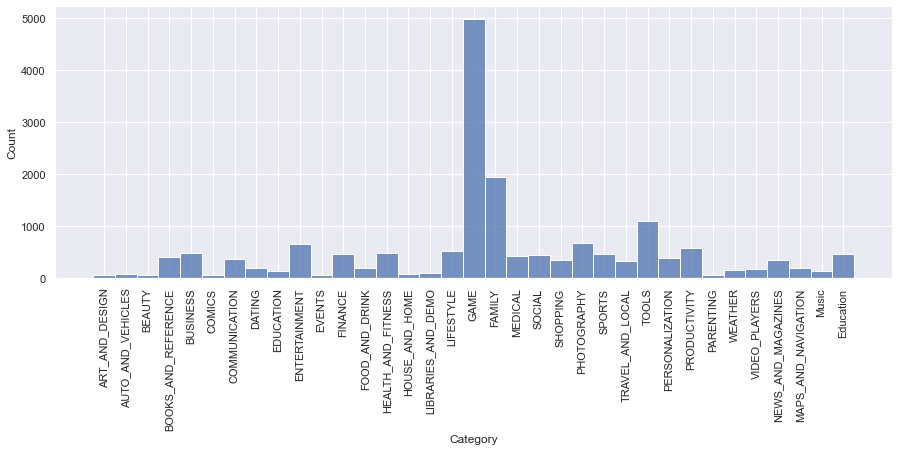

In [170]:
sns.set(rc={'figure.figsize': [15,5]}, font_scale=1)
plt.xticks(rotation=90)
sns.histplot(data=df_app, x='Category')

**What are the ratings of the most expensive applications (above 100$)?**

<AxesSubplot:xlabel='App', ylabel='Rating'>

C:\Users\Shady\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Shady\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 25105 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Shady\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 24456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Shady\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26377 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Shady\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 37666 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Shady\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 128142 missing from

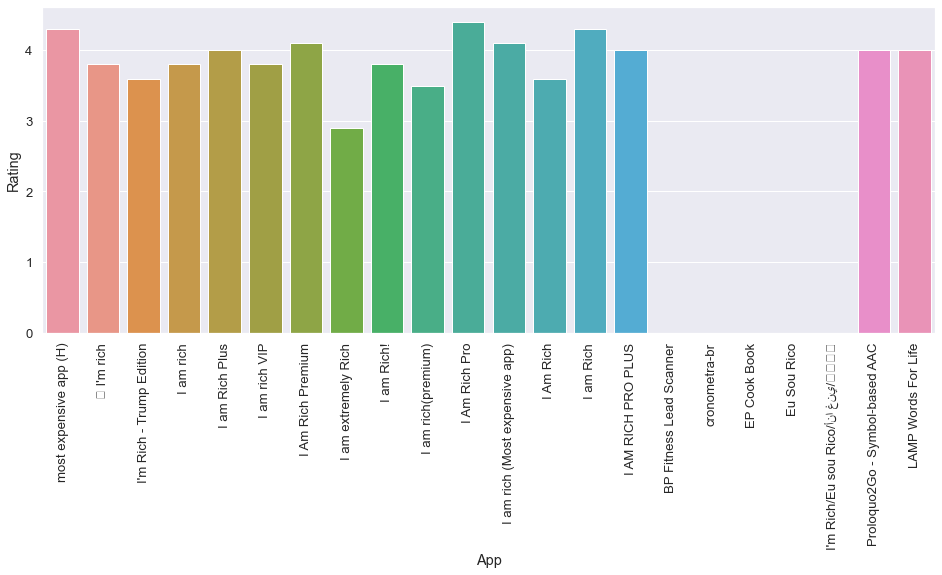

In [180]:
sns.set(rc={'figure.figsize': [16,6]}, font_scale=1.2)
plt.xticks(rotation=90)
sns.barplot(x='App', y='Rating', data=df_app[df_app.price_USD>100])

In [298]:
# Calssifying categories rating per store
pd.pivot_table(df_app, 'Rating', 'Category', 'Store', margins=True)

Store,Apple Store,Google Play Store,All
Category,,,
ART_AND_DESIGN,NaN,4.153125,4.153125
AUTO_AND_VEHICLES,NaN,3.598824,3.598824
BEAUTY,NaN,3.390566,3.390566
BOOKS_AND_REFERENCE,2.848571,3.307658,3.105290
BUSINESS,3.745614,2.566429,2.707338
COMICS,NaN,4.025926,4.025926
COMMUNICATION,NaN,3.349524,3.349524
DATING,NaN,3.111111,3.111111
EDUCATION,NaN,4.327731,4.327731


**Difference of ratings of categories per store.**

<AxesSubplot:xlabel='Category', ylabel='Rating'>

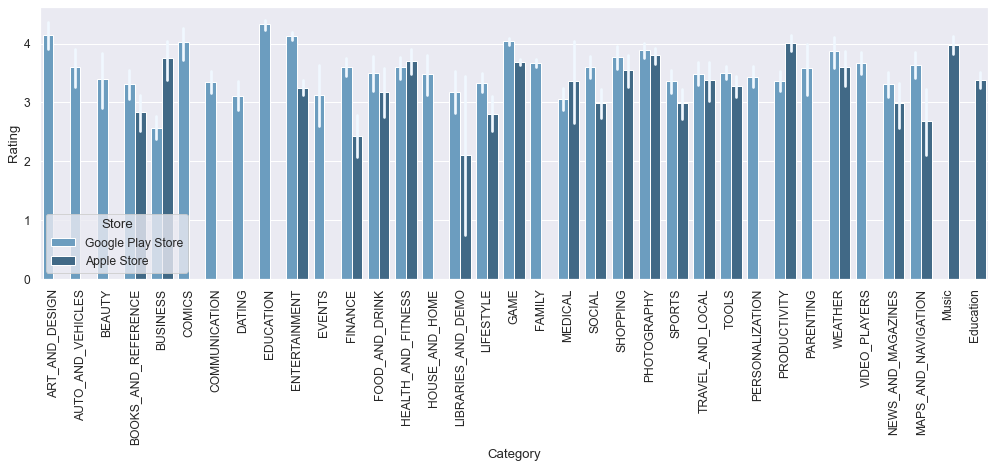

In [258]:
# Visualising above finding
sns.set(rc={'figure.figsize': [17,5]}, font_scale=1.1)
plt.xticks(rotation=90)
sns.barplot(data=df_app, x='Category', y='Rating', hue='Store', errcolor='aliceblue', palette='Blues_d')

In [374]:
# Grouping application prices for applications available within the 2 stores
# app_srs is a pd.Series for duplicate applications in both stores
app_srs=df_app.groupby(['App']).count()[df_app.groupby(['App']).count()['Category']==2].reset_index('App').App

# Create a DataFrame holding Applications available in both stores
df_apps=df_app[df_app.App.isin(app_srs)]
tmp=pd.pivot_table(df_apps, 'price_USD', 'App', 'Store')

C:\Users\Shady\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 92.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Shady\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 38.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Shady\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 27.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:title={'center':'Prices variation in stores for same applications ($)'}, xlabel='Google Play Store', ylabel='Apple Store'>

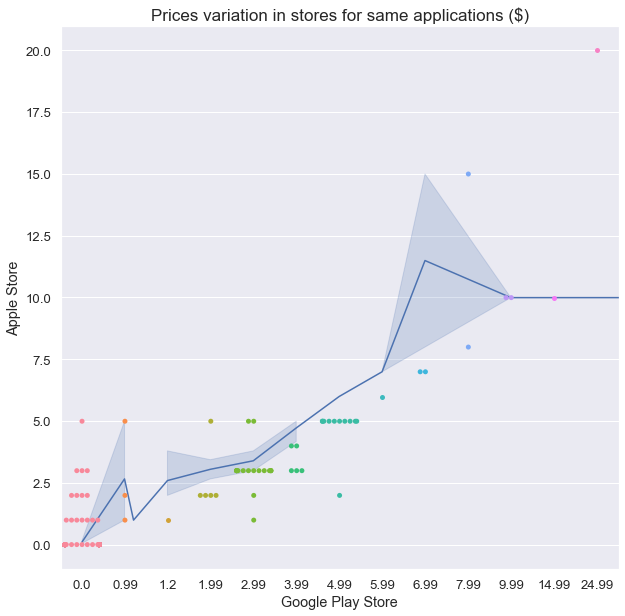

In [377]:
sns.set(rc={'figure.figsize': [10,10]}, font_scale=1.2)
plt.title('Prices variation in stores for same applications ($)', fontdict={'fontsize':17})
sns.swarmplot(data=tmp, x='Google Play Store', y='Apple Store')
sns.lineplot(data=tmp, x='Google Play Store', y='Apple Store')

Although applications' prices tend to be close in both stores, however, some may encounter a difference.

Prices variation per content type

<AxesSubplot:xlabel='cont_rating', ylabel='price_USD'>

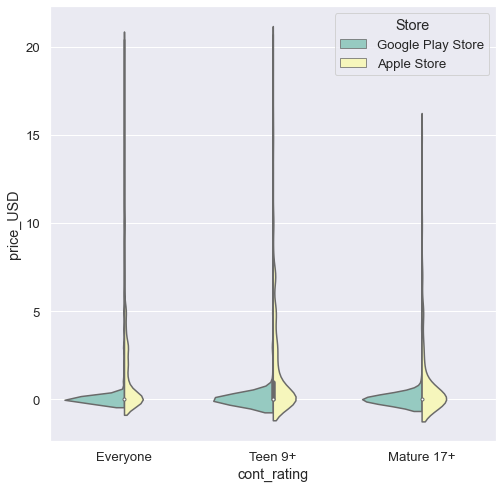

In [402]:
# Prices variance per application age-rating
sns.set(rc={'figure.figsize': [8,8]}, font_scale=1.2)
sns.violinplot(x='cont_rating', y='price_USD', data=df_app[df_app.price_USD<20], palette='Set3', hue='Store',
              split=True)

___
### Arranging the dataset for learning

In [573]:
cont_dict={'Everyone': 0, 'Teen 9+': 1, 'Mature 17+': 2}

df_app_lrn=pd.get_dummies(df_app, columns=['Store', 'Category'], drop_first=True)
df_app_lrn.cont_rating=df_app_lrn.cont_rating.map(cont_dict)

In [574]:
outliers_indices=detect_outliers(df_app_lrn, 1, df_app_lrn[['price_USD']])
df_app_lrn.drop(outliers_indices, inplace=True)

Text(0.5, 1.0, 'Examining outliers')

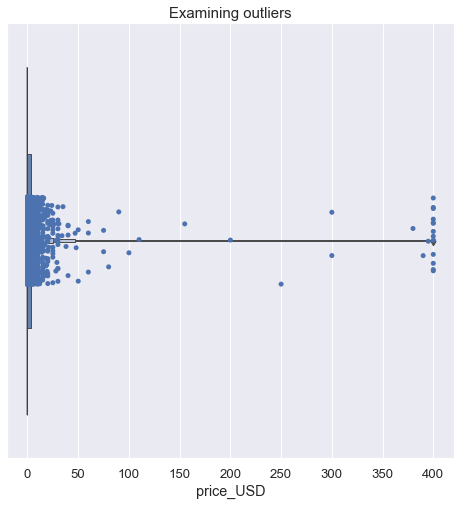

In [599]:
# Detecting outliers
sns.boxenplot(x='price_USD', data=df_app_lrn)
sns.stripplot(x='price_USD', data=df_app_lrn)
plt.title('Examining outliers', fontdict={'fontsize':15})

Most of applications are Free, however some are with values far greater than zero, so we will not delete all outliers. This shall be handeled as an imbalanced data.

In [275]:
df_app.sample(2)

,Store,App,Category,Rating,Reviews,size_bytes,price_USD,cont_rating,ver
1534,Google Play Store,Major Mayhem,GAME,4.6,520962,39000000.0,0.0,Teen 9+,108
2140,Google Play Store,"RetailMeNot - Coupons, Deals & Discount Shopping",SHOPPING,4.4,210208,11000000.0,0.0,Everyone,Varies with device


In [575]:
# Splitting data to Train and Test splits
X=df_app_lrn.drop(['Rating','App','ver'], axis=1)
y=df_app_lrn['Rating']
X_train, X_test, y_train, y_test=train_test_split(X,y)

In [576]:
sorted(Counter(y_train).items())

[(0.0, 1791),
 (1.0, 46),
 (1.4, 3),
 (1.5, 52),
 (1.6, 4),
 (1.7, 8),
 (1.8, 6),
 (1.9, 8),
 (2.0, 78),
 (2.1, 6),
 (2.2, 9),
 (2.3, 15),
 (2.4, 18),
 (2.5, 161),
 (2.6, 20),
 (2.7, 19),
 (2.8, 29),
 (2.9, 34),
 (3.0, 360),
 (3.1, 54),
 (3.2, 44),
 (3.3, 74),
 (3.4, 96),
 (3.5, 644),
 (3.6, 120),
 (3.7, 167),
 (3.8, 210),
 (3.9, 271),
 (4.0, 1573),
 (4.1, 460),
 (4.2, 601),
 (4.3, 683),
 (4.4, 686),
 (4.5, 2611),
 (4.6, 535),
 (4.7, 331),
 (4.8, 178),
 (4.9, 66),
 (5.0, 563)]

In [578]:
# Avoiding continuous data represented in the float Ratings
le = LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.fit_transform(y_test)

# To transform labels back to original encoding
# le.inverse_transform(y_train)
# le.inverse_transform(y_test)

In [580]:
sorted(Counter(y_train).items())

[(0, 1791),
 (1, 46),
 (2, 3),
 (3, 52),
 (4, 4),
 (5, 8),
 (6, 6),
 (7, 8),
 (8, 78),
 (9, 6),
 (10, 9),
 (11, 15),
 (12, 18),
 (13, 161),
 (14, 20),
 (15, 19),
 (16, 29),
 (17, 34),
 (18, 360),
 (19, 54),
 (20, 44),
 (21, 74),
 (22, 96),
 (23, 644),
 (24, 120),
 (25, 167),
 (26, 210),
 (27, 271),
 (28, 1573),
 (29, 460),
 (30, 601),
 (31, 683),
 (32, 686),
 (33, 2611),
 (34, 535),
 (35, 331),
 (36, 178),
 (37, 66),
 (38, 563)]

In [582]:
# n_neighbors parameter of SMOTE class to be less than minimum n_samples
X_resampled, y_resampled = SMOTE(k_neighbors=2).fit_resample(X_train, y_train)
sorted(Counter(y_resampled).items())

[(0, 2611),
 (1, 2611),
 (2, 2611),
 (3, 2611),
 (4, 2611),
 (5, 2611),
 (6, 2611),
 (7, 2611),
 (8, 2611),
 (9, 2611),
 (10, 2611),
 (11, 2611),
 (12, 2611),
 (13, 2611),
 (14, 2611),
 (15, 2611),
 (16, 2611),
 (17, 2611),
 (18, 2611),
 (19, 2611),
 (20, 2611),
 (21, 2611),
 (22, 2611),
 (23, 2611),
 (24, 2611),
 (25, 2611),
 (26, 2611),
 (27, 2611),
 (28, 2611),
 (29, 2611),
 (30, 2611),
 (31, 2611),
 (32, 2611),
 (33, 2611),
 (34, 2611),
 (35, 2611),
 (36, 2611),
 (37, 2611),
 (38, 2611)]

In [598]:
# Scaling features
scaler = StandardScaler().fit(X_resampled)
X_scaled_train = scaler.transform(X_resampled)
X_scaled_test = scaler.transform(X_test)

After that, data is ready for Machine Learning models to predict for ratings
#### Recommendations
It's better to increase the data used in the analysis, whether searching for additional datasets, scraping different stores data, or getting an API for the Android/Apple/Huawei/… stores.
